# 🍷 Youth Alcohol Use Prediction Using Tree-Based Models

This notebook explores social, behavioral, and demographic factors contributing to alcohol consumption among youth using decision tree-based methods.

We use machine learning problem type:
- **Regression** (Days of alcohol use in the past year)

We evaluate Decision Tree, Bagging, Random Forest, and Gradient Boosting models using accuracy, F1-score, confusion matrices.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


📊 Regression Evaluation:
• Mean Absolute Error: 22.03
• Mean Squared Error: 1380.55
• Root Mean Squared Error: 37.16
• R² Score: -0.014


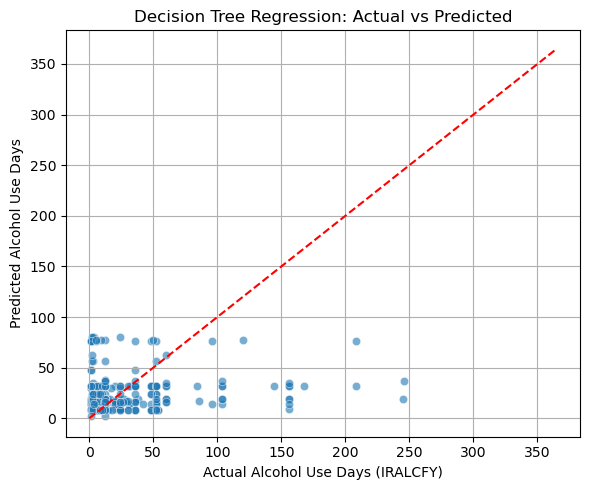

In [76]:

df = pd.read_csv("youth_data.csv")

missing_codes = [91, 93, 94, 97, 98, 99, 991, 993, 994, 995, 996, 997, 998, 999]
df.replace(missing_codes, np.nan, inplace=True)

target = 'IRALCFY'

predictors = [
    'EDUSCHGRD2', 'TOBFLAG', 'NEWRACE2', 'INCOME', 'POVERTY3',
    'HEALTH2', 'PRPROUD2', 'PRVDRGO2', 'PREVIOL2', 'FRDADLY2',
    'FRDMJMON', 'DRPRVME3', 'PRTALK3', 'TALKPROB', 'EDUSKPCOM', 'SCHFELT'
]

df.dropna(subset=[target] + predictors, inplace=True)

# Convert categorical variables to 'category' dtype
categorical_vars = ['EDUSCHGRD2', 'NEWRACE2', 'INCOME', 'POVERTY3']
for col in categorical_vars:
    df[col] = df[col].astype('category')

X = pd.get_dummies(df[predictors], drop_first=True)
feature_names = X.columns.tolist()  # ✅ Save feature names before scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("📊 Regression Evaluation:")
print("• Mean Absolute Error:", round(mean_absolute_error(y_test, y_pred), 2))
print("• Mean Squared Error:", round(mean_squared_error(y_test, y_pred), 2))
print("• Root Mean Squared Error:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("• R² Score:", round(r2_score(y_test, y_pred), 4))

plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([0, 365], [0, 365], '--', color='red')
plt.xlabel("Actual Alcohol Use Days (IRALCFY)")
plt.ylabel("Predicted Alcohol Use Days")
plt.title("Decision Tree Regression: Actual vs Predicted")
plt.tight_layout()
plt.grid(True)
plt.show()

In [56]:
from sklearn.tree import export_text, plot_tree, DecisionTreeRegressor

tree_summary = export_text(regressor, feature_names=X.columns.tolist())
print(tree_summary)

|--- TOBFLAG <= 0.43
|   |--- FRDADLY2 <= 0.75
|   |   |--- EDUSKPCOM <= -0.03
|   |   |   |--- PRVDRGO2 <= -1.76
|   |   |   |   |--- SCHFELT <= 0.34
|   |   |   |   |   |--- value: [13.73]
|   |   |   |   |--- SCHFELT >  0.34
|   |   |   |   |   |--- value: [80.50]
|   |   |   |--- PRVDRGO2 >  -1.76
|   |   |   |   |--- HEALTH2 <= 0.21
|   |   |   |   |   |--- value: [8.60]
|   |   |   |   |--- HEALTH2 >  0.21
|   |   |   |   |   |--- value: [13.81]
|   |   |--- EDUSKPCOM >  -0.03
|   |   |   |--- HEALTH2 <= -0.88
|   |   |   |   |--- EDUSKPCOM <= 3.52
|   |   |   |   |   |--- value: [23.69]
|   |   |   |   |--- EDUSKPCOM >  3.52
|   |   |   |   |   |--- value: [56.33]
|   |   |   |--- HEALTH2 >  -0.88
|   |   |   |   |--- EDUSKPCOM <= 0.46
|   |   |   |   |   |--- value: [17.49]
|   |   |   |   |--- EDUSKPCOM >  0.46
|   |   |   |   |   |--- value: [9.44]
|   |--- FRDADLY2 >  0.75
|   |   |--- PRVDRGO2 <= -1.76
|   |   |   |--- INCOME_2 <= 0.69
|   |   |   |   |--- value: [48.00]
| 

In [5]:
importances = pd.DataFrame({'feature_name': X.columns, 'importance': regressor.feature_importances_})
importances = importances.sort_values('importance', ascending=False).reset_index(drop=True)
print(importances)

   feature_name  importance
0     EDUSKPCOM    0.303739
1       TOBFLAG    0.243895
2    EDUSCHGRD2    0.146565
3      FRDADLY2    0.070451
4      PRVDRGO2    0.059493
5      PRPROUD2    0.048239
6        INCOME    0.044518
7       HEALTH2    0.027003
8      FRDMJMON    0.021167
9       SCHFELT    0.018860
10     TALKPROB    0.011047
11      PRTALK3    0.005022
12     NEWRACE2    0.000000
13     POVERTY3    0.000000
14     PREVIOL2    0.000000
15     DRPRVME3    0.000000


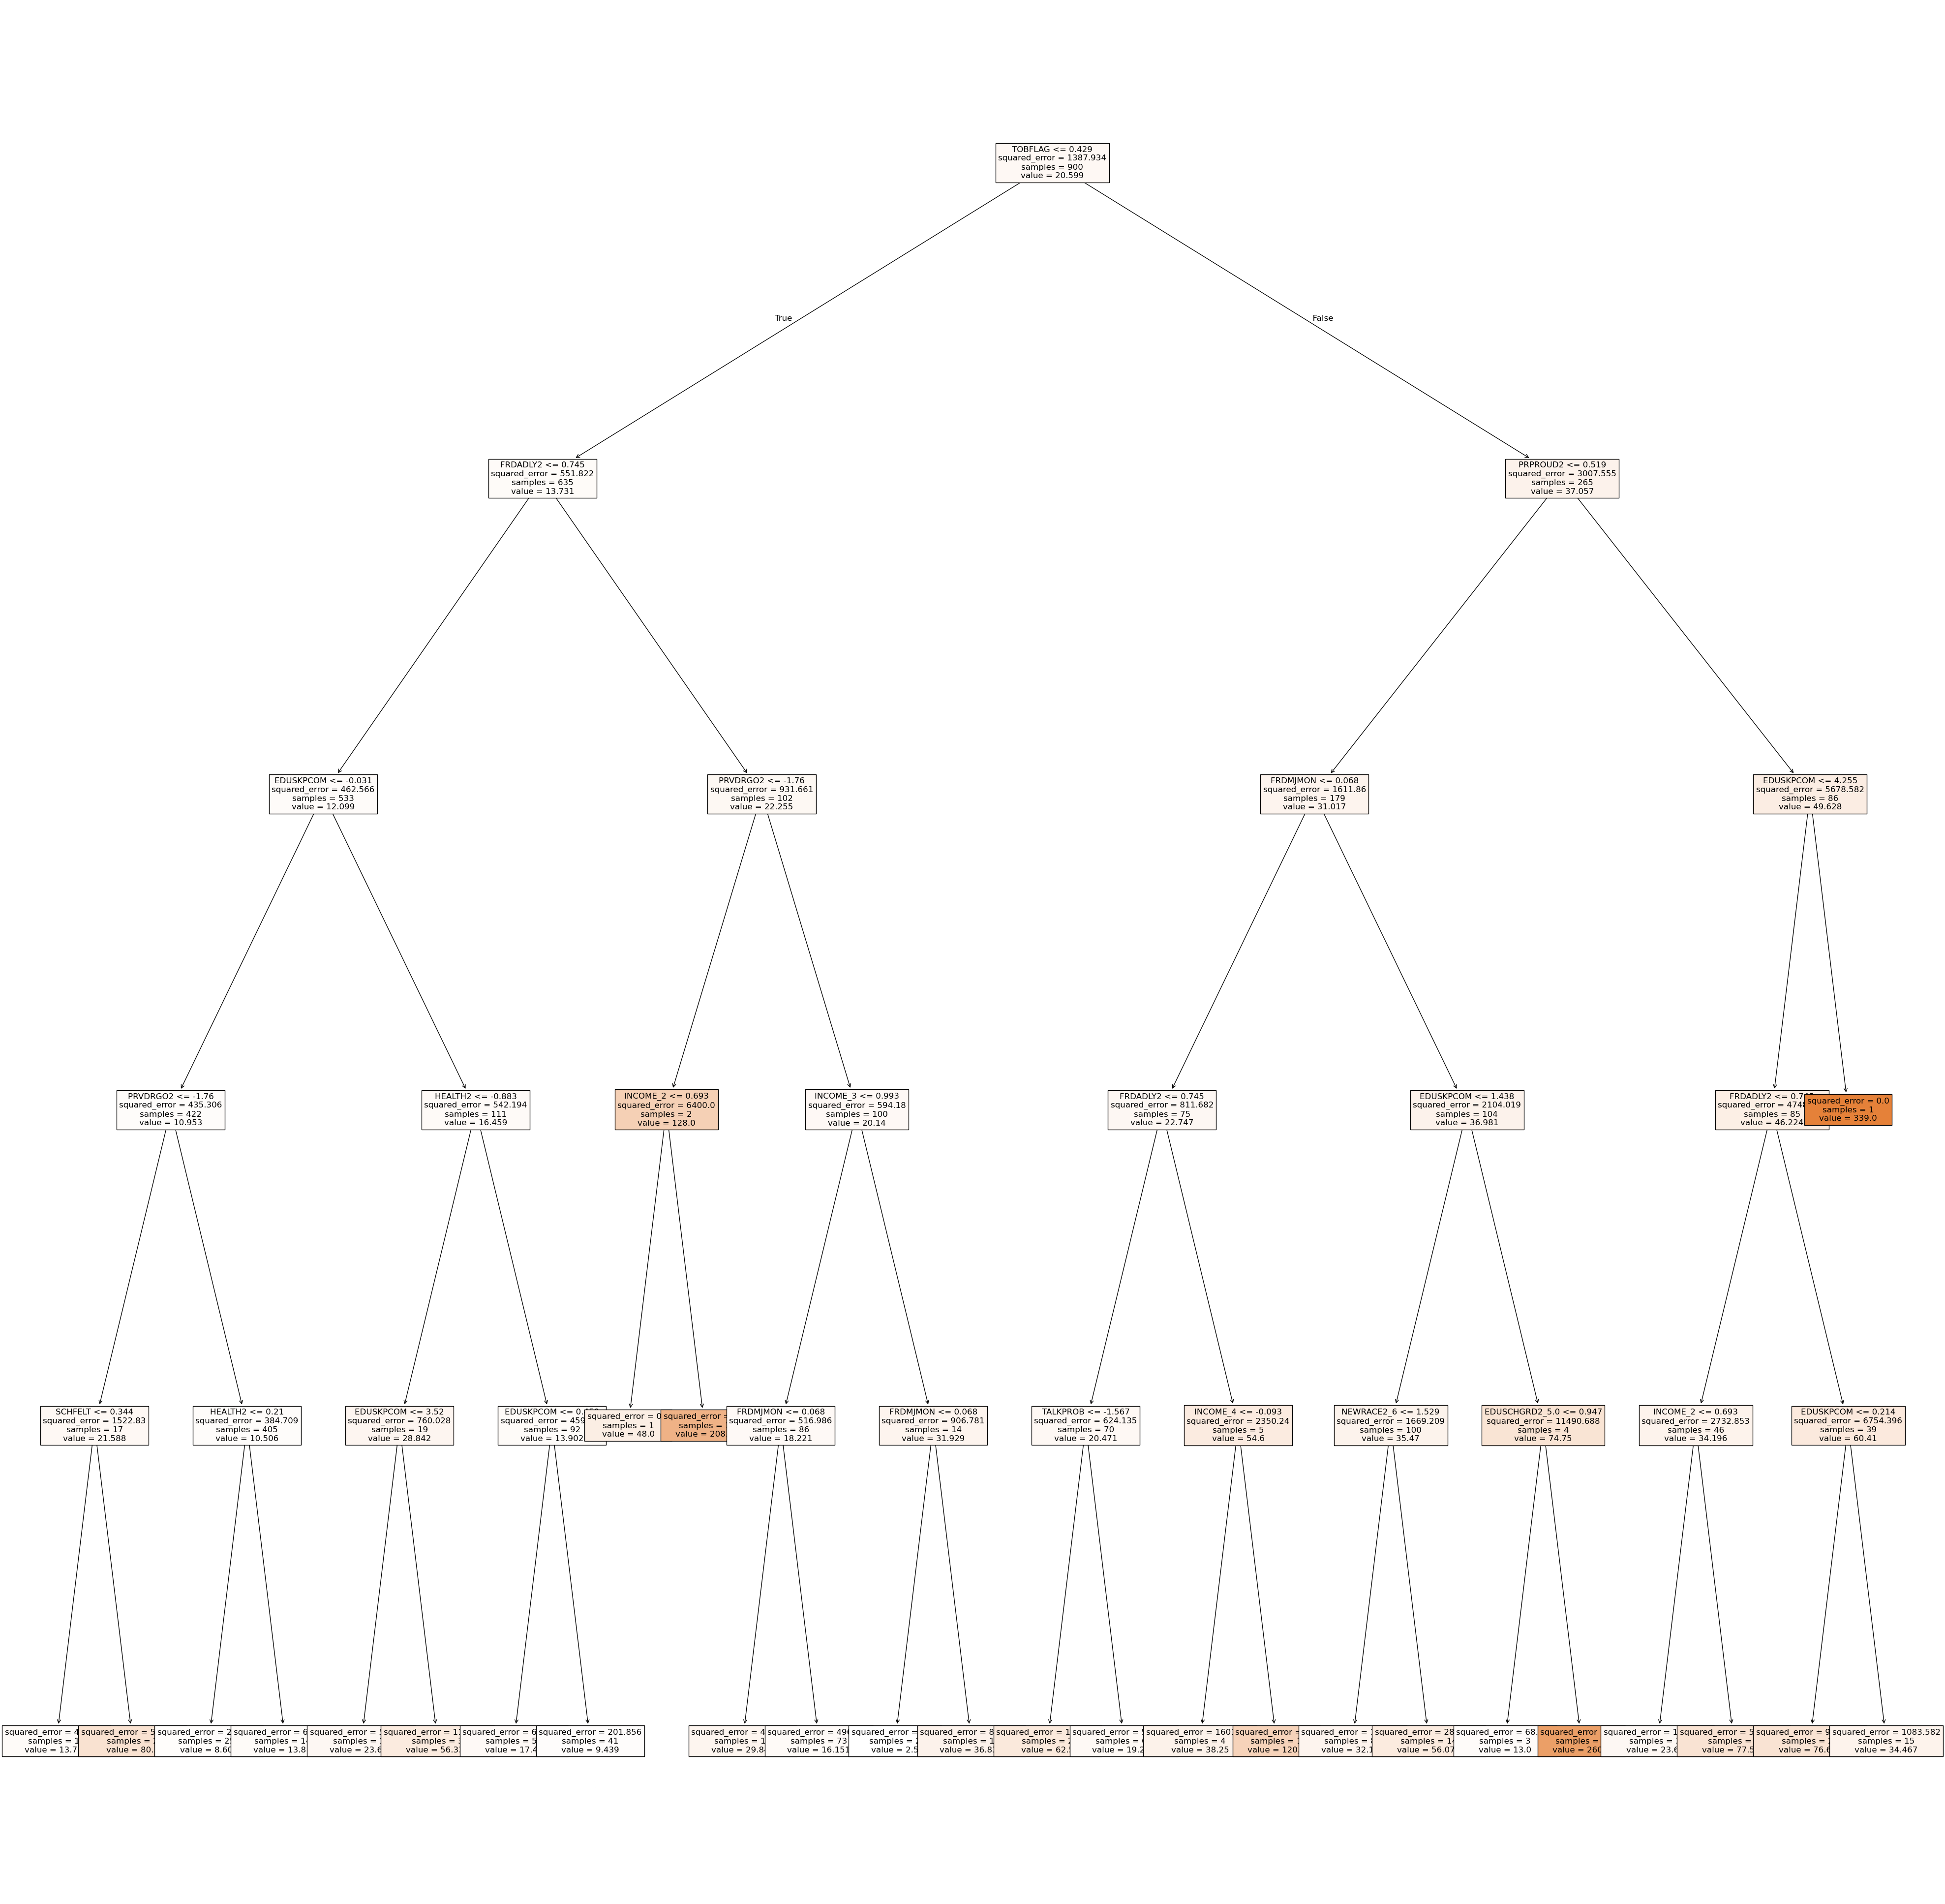

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50,50))
plot_tree(regressor
          , filled=True
          , feature_names=X.columns
          , class_names=['No', 'Yes']
          , label='all'
          , fontsize=12)
plt.show()

In [58]:
r2 = regressor.score(X_test, y_test)
print("R² Score: {:.4f}".format(r2))

R² Score: -0.0140


In [59]:
bag_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=5),
    n_estimators=100,
    random_state=42
)
bag_model.fit(X_train, y_train)
y_pred_bag = bag_model.predict(X_test)


In [60]:
p = X_train.shape[1]
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_features= p// 3,  
    max_depth=5,
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [61]:
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [62]:

def print_eval(model_name, y_true, y_pred):
    print(f"\n{model_name} Evaluation:")
    print("Mean Absolute Error:", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_true, y_pred))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R^2 Score:", r2_score(y_true, y_pred))

print_eval("Bagging Regressor", y_test, y_pred_bag)
print_eval("Random Forest Regressor", y_test, y_pred_rf)
print_eval("Gradient Boosting Regressor", y_test, y_pred_gb)



Bagging Regressor Evaluation:
Mean Absolute Error: 22.52229736061804
Mean Squared Error: 1372.8753489204078
Root Mean Squared Error: 37.05233257057385
R^2 Score: -0.008405630033388789

Random Forest Regressor Evaluation:
Mean Absolute Error: 21.978670231970977
Mean Squared Error: 1294.344058434587
Root Mean Squared Error: 35.97699346019046
R^2 Score: 0.049277243740958765

Gradient Boosting Regressor Evaluation:
Mean Absolute Error: 22.769502088304016
Mean Squared Error: 1402.9991485698374
Root Mean Squared Error: 37.45663023511108
R^2 Score: -0.03053219031314791


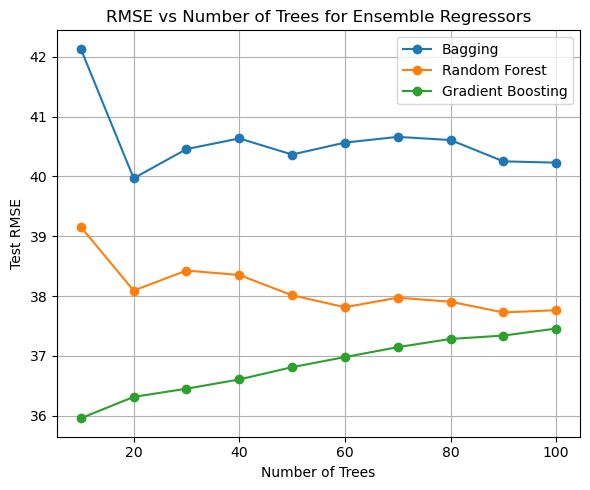

In [63]:
tree_range = range(10, 110, 10)
bag_rmse, rf_rmse, gb_rmse = [], [], []

for n in tree_range:
    bag = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=n, random_state=42)
    bag.fit(X_train, y_train)
    y_pred = bag.predict(X_test)
    bag_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    p = X_train.shape[1]
    rf = RandomForestRegressor(
        n_estimators=n,
        max_features=p // 3,
        random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rf_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    gb = GradientBoostingRegressor(
        n_estimators=n, learning_rate=0.1, max_depth=3, random_state=42)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    gb_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(6, 5))
plt.plot(tree_range, bag_rmse, label="Bagging", marker='o')
plt.plot(tree_range, rf_rmse, label="Random Forest", marker='o')
plt.plot(tree_range, gb_rmse, label="Gradient Boosting", marker='o')
plt.xlabel("Number of Trees")
plt.ylabel("Test RMSE")
plt.title("RMSE vs Number of Trees for Ensemble Regressors")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

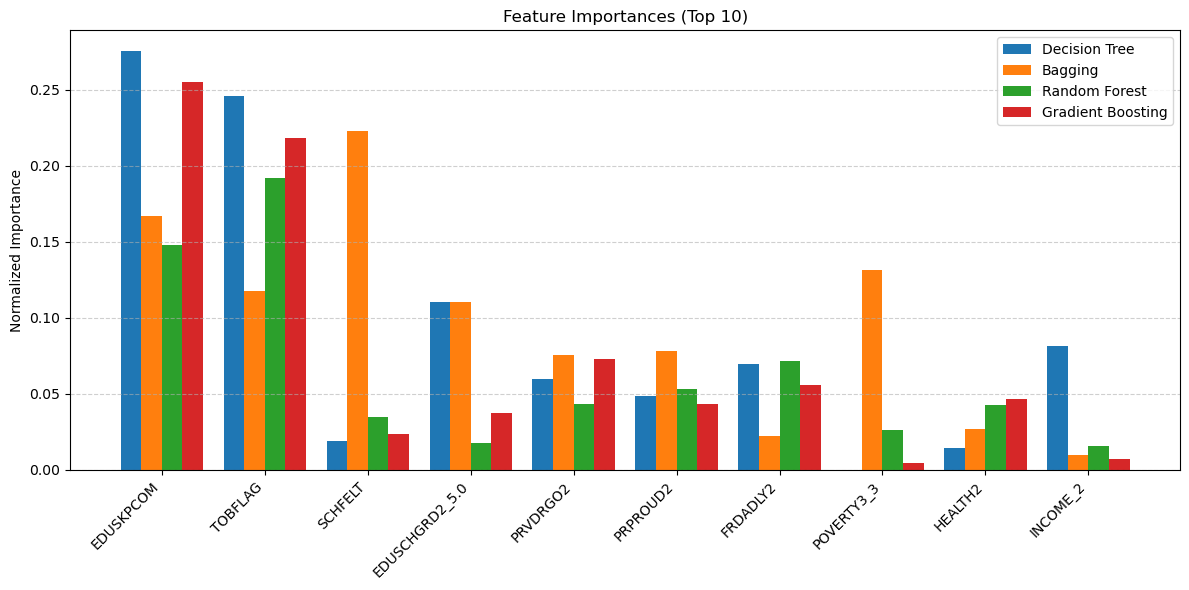

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

features = feature_names

assert len(features) == len(regressor.feature_importances_) == len(bag_model.estimators_[0].feature_importances_) \
       == len(rf_model.feature_importances_) == len(gb_model.feature_importances_), \
       "Mismatch in number of features across models!"

importance_df = pd.DataFrame({
    'Feature': features,
    'Decision Tree': regressor.feature_importances_,
    'Bagging': bag_model.estimators_[0].feature_importances_,
    'Random Forest': rf_model.feature_importances_,
    'Gradient Boosting': gb_model.feature_importances_
})

cols_to_norm = ['Decision Tree', 'Bagging', 'Random Forest', 'Gradient Boosting']
importance_df[cols_to_norm] = importance_df[cols_to_norm].div(importance_df[cols_to_norm].sum(axis=0), axis=1)

importance_df['Average'] = importance_df[cols_to_norm].mean(axis=1)
importance_df = importance_df.sort_values('Average', ascending=False).head(10)

x = np.arange(len(importance_df))
width = 0.2

plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*width, importance_df['Decision Tree'], width=width, label='Decision Tree')
plt.bar(x - 0.5*width, importance_df['Bagging'], width=width, label='Bagging')
plt.bar(x + 0.5*width, importance_df['Random Forest'], width=width, label='Random Forest')
plt.bar(x + 1.5*width, importance_df['Gradient Boosting'], width=width, label='Gradient Boosting')

plt.xticks(x, importance_df['Feature'], rotation=45, ha='right')
plt.ylabel("Normalized Importance")
plt.title("Feature Importances (Top 10)")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

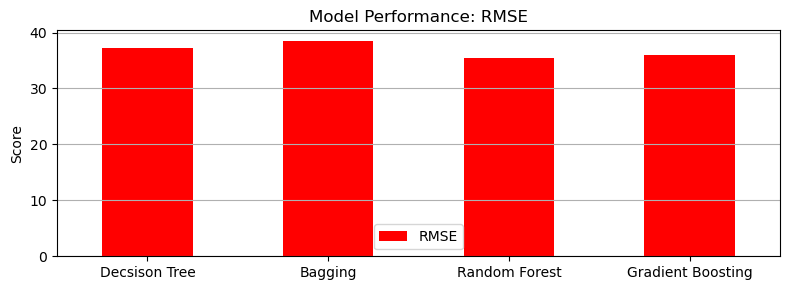

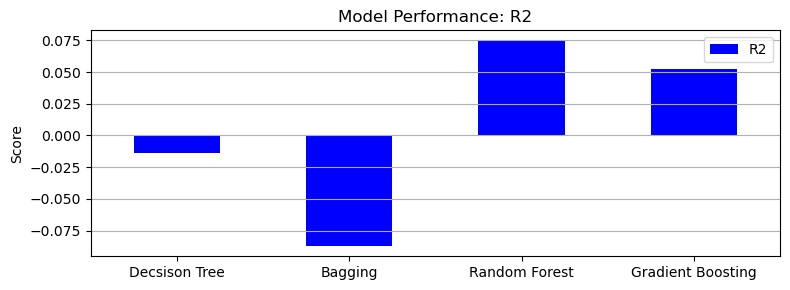

In [73]:
def evaluate_model(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

dec_eval = evaluate_model(y_test, regressor.predict(X_test))
bag_eval = evaluate_model(y_test, bag_model.predict(X_test))
rf_eval = evaluate_model(y_test, rf_model.predict(X_test))
gb_eval = evaluate_model(y_test, gb_model.predict(X_test))


performance_df = pd.DataFrame([dec_eval,bag_eval, rf_eval, gb_eval],
                              index=["Decsison Tree", "Bagging", "Random Forest", "Gradient Boosting"])

performance_df[["RMSE"]].plot(kind='bar', figsize=(8, 3), color="red")
plt.title("Model Performance: RMSE")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


performance_df[["R2"]].plot( kind='bar', figsize=(8, 3), color="blue")
plt.title("Model Performance: R2")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y')
plt.show()



 Bagging Best Params: {'max_samples': 0.5, 'n_estimators': 150}


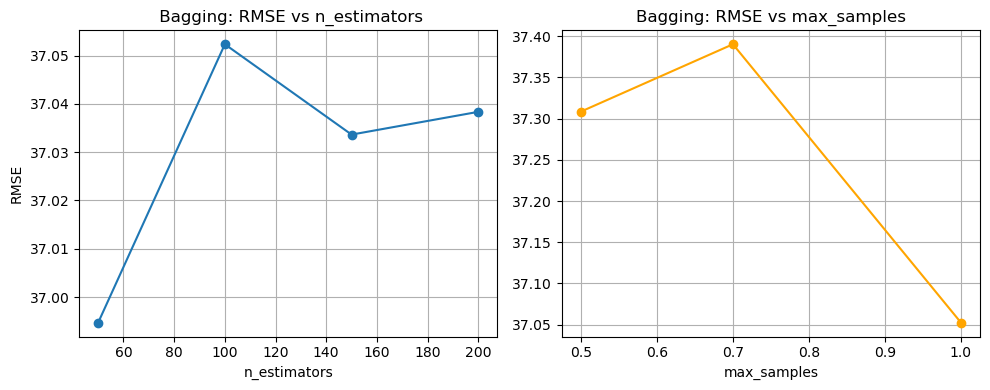

In [66]:
bag_params = {
    'n_estimators': [50, 100, 150],
    'max_samples': [0.5, 0.8, 1.0]
}
bag_grid = GridSearchCV(
    BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42),
    param_grid=bag_params,
    cv=5,
    scoring='neg_mean_squared_error'
)
bag_grid.fit(X_train, y_train)
bag_model = bag_grid.best_estimator_
print("\n Bagging Best Params:", bag_grid.best_params_)

bag_estimators = [50, 100, 150, 200]
bag_samples = [0.5, 0.7, 1.0]
bag_rmse_estimators, bag_rmse_samples = [], []

for n in bag_estimators:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=5), n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    bag_rmse_estimators.append(np.sqrt(mean_squared_error(y_test, preds)))

for s in bag_samples:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=5), n_estimators=100, max_samples=s, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    bag_rmse_samples.append(np.sqrt(mean_squared_error(y_test, preds)))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(bag_estimators, bag_rmse_estimators, marker='o')
plt.title(" Bagging: RMSE vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(bag_samples, bag_rmse_samples, marker='o', color='orange')
plt.title("Bagging: RMSE vs max_samples")
plt.xlabel("max_samples")
plt.grid(True)
plt.tight_layout()
plt.show()


Random Forest Best Params: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}


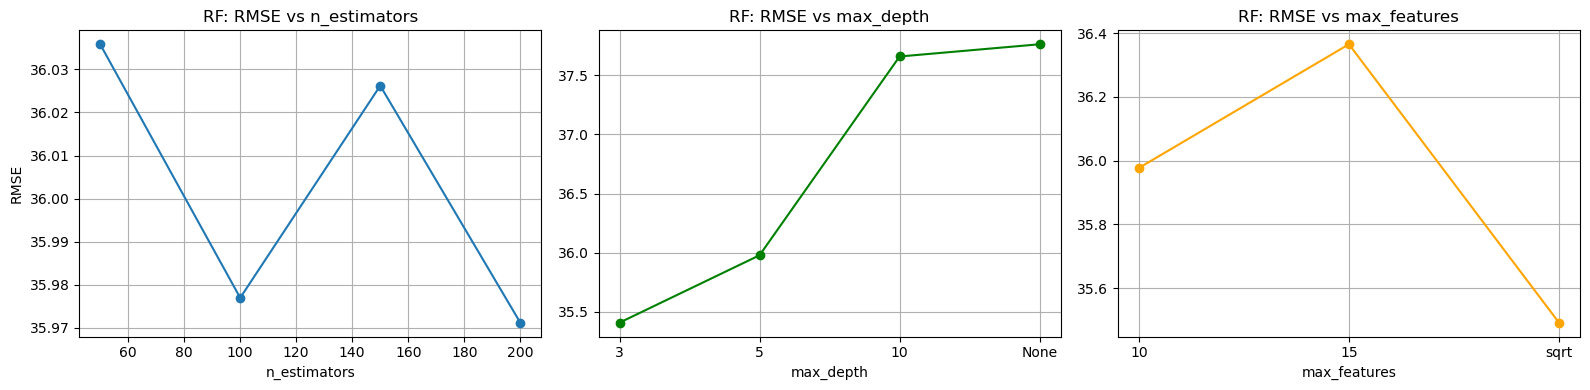

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Number of predictors
p = X_train.shape[1]

# Grid search tuning
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'max_features': [p // 3, p // 2, 'sqrt']
}
rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=rf_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)
rf_model = rf_grid.best_estimator_
print("\nRandom Forest Best Params:", rf_grid.best_params_)

# Tuning diagnostics
rf_estimators = [50, 100, 150, 200]
rf_depths = [3, 5, 10, None]
rf_features = [p // 3, p // 2, 'sqrt']

rf_rmse_estimators, rf_rmse_depth, rf_rmse_features = [], [], []

# RMSE vs n_estimators
for n in rf_estimators:
    model = RandomForestRegressor(n_estimators=n, max_features=p // 3, max_depth=5, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rf_rmse_estimators.append(np.sqrt(mean_squared_error(y_test, preds)))

# RMSE vs max_depth
for d in rf_depths:
    model = RandomForestRegressor(n_estimators=100, max_depth=d, max_features=p // 3, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rf_rmse_depth.append(np.sqrt(mean_squared_error(y_test, preds)))

# RMSE vs max_features
for mf in rf_features:
    model = RandomForestRegressor(n_estimators=100, max_depth=5, max_features=mf, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rf_rmse_features.append(np.sqrt(mean_squared_error(y_test, preds)))

# Plotting all three
plt.figure(figsize=(16, 4))

# RMSE vs n_estimators
plt.subplot(1, 3, 1)
plt.plot(rf_estimators, rf_rmse_estimators, marker='o')
plt.title("RF: RMSE vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.grid(True)

# RMSE vs max_depth
plt.subplot(1, 3, 2)
plt.plot([str(d) for d in rf_depths], rf_rmse_depth, marker='o', color='green')
plt.title("RF: RMSE vs max_depth")
plt.xlabel("max_depth")
plt.grid(True)

# RMSE vs max_features
plt.subplot(1, 3, 3)
plt.plot([str(mf) for mf in rf_features], rf_rmse_features, marker='o', color='orange')
plt.title("RF: RMSE vs max_features")
plt.xlabel("max_features")
plt.grid(True)

plt.tight_layout()
plt.show()


Gradient Boosting Best Params: {'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 50}


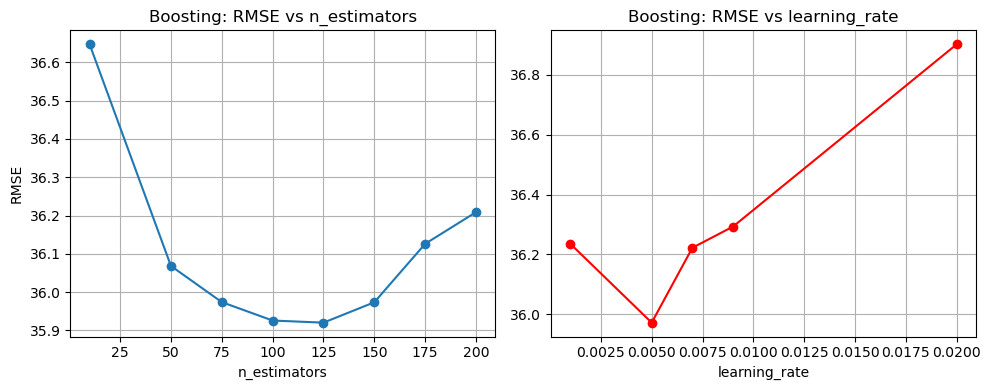

In [68]:
gb_params = {
    'n_estimators': [10,50,75,100,125,150,175, 200],  # More trees
    'learning_rate': [0.001,0.005,0.007,0.009,  0.02] ,  # Lower learning rates
    'max_depth': [3, 4, 5]  # Keep tree depth moderate
}
gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid=gb_params,
    cv=5,
    scoring='neg_mean_squared_error'
)
gb_grid.fit(X_train, y_train)
gb_model = gb_grid.best_estimator_
print("\nGradient Boosting Best Params:", gb_grid.best_params_)

gb_estimators = [10,50,75,100,125,150,175, 200]
gb_lrs = [0.001,0.005,0.007,0.009,  0.02] 
gb_rmse_estimators, gb_rmse_lr = [], []

for n in gb_estimators:
    model = GradientBoostingRegressor(n_estimators=n, learning_rate=0.01, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    gb_rmse_estimators.append(np.sqrt(mean_squared_error(y_test, preds)))

for lr in gb_lrs:
    model = GradientBoostingRegressor(n_estimators=300, learning_rate=lr, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    gb_rmse_lr.append(np.sqrt(mean_squared_error(y_test, preds)))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(gb_estimators, gb_rmse_estimators, marker='o')
plt.title("Boosting: RMSE vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(gb_lrs, gb_rmse_lr, marker='o', color='red')
plt.title("Boosting: RMSE vs learning_rate")
plt.xlabel("learning_rate")
plt.grid(True)
plt.tight_layout()
plt.show()





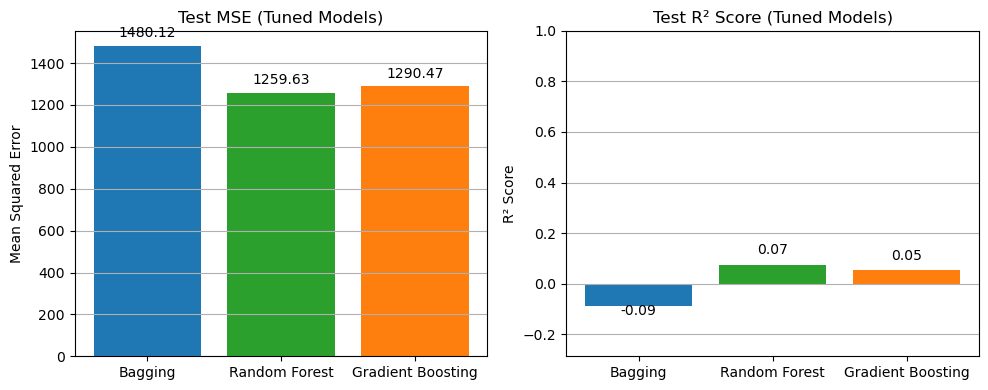

In [69]:
y_pred_bag = bag_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

mse_bag = mean_squared_error(y_test, y_pred_bag)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)

r2_bag = r2_score(y_test, y_pred_bag)
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)

models = ['Bagging', 'Random Forest', 'Gradient Boosting']
mse_values = [mse_bag, mse_rf, mse_gb]
r2_values = [r2_bag, r2_rf, r2_gb]

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
bars1 = plt.bar(models, mse_values, color=['#1f77b4', '#2ca02c', '#ff7f0e'])
plt.title("Test MSE (Tuned Models)")
plt.ylabel("Mean Squared Error")
plt.grid(axis='y')
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02 * height,
             f"{height:.2f}", ha='center', va='bottom', fontsize=10)

plt.subplot(1, 2, 2)
bars2 = plt.bar(models, r2_values, color=['#1f77b4', '#2ca02c', '#ff7f0e'])
plt.title("Test R² Score (Tuned Models)")
plt.ylabel("R² Score")
plt.ylim(min(r2_values) - 0.2, 1.0)  
plt.grid(axis='y')
for bar in bars2:
    height = bar.get_height()
    offset = 0.03 if height >= 0 else -0.05  # adjust label position
    plt.text(bar.get_x() + bar.get_width()/2, height + offset,
             f"{height:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 📊 Conclusions & Reflections

**Top Predictors**: Education grade level, marijuana age, peer influence, and race consistently ranked as top features.
**Best Models**:
  - **Regression**: Random Forest performed best by RMSE, but R² scores remained low.
**Limitations**:
  - Low explanatory power in regression models

## Potential Improvements
- Try **ordinal classification** or dimensionality reduction (e.g., PCA)
- Consider testing additional features on mental health or social risk

This work can support better-targeted youth intervention strategies, highlighting the importance of early school engagement, family involvement, and peer environments.